In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
df=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\declustering_correlation_metrics.csv")
df

,Spacetime_distance,Mainshock,Aftershock,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,index
0,2.885439e+07,1907.0,0.0,24328471,2020-04-28 13:00:30.050000,38.4607,13.64330,17.7,SURVEY-INGV,NaN,NaN,NaN,ML,3.5,--,Tirreno Meridionale (MARE),0
1,3.537832e+06,2.0,1.0,24326871,2020-04-28 07:14:45.750000,38.5943,14.17220,27.5,SURVEY-INGV,NaN,NaN,NaN,ML,3.0,--,Tirreno Meridionale (MARE),1
2,8.460595e+06,9.0,2.0,24326451,2020-04-28 05:57:28.820000,38.4052,13.60600,25.4,SURVEY-INGV,NaN,NaN,NaN,ML,3.1,--,Costa Siciliana centro-settentrionale (Palermo),2
3,3.531638e+07,6208.0,3.0,24317311,2020-04-26 02:59:02.450000,40.8285,14.15167,2.5,SURVEY-INGV-OV,NaN,NaN,NaN,Md,3.1,--,5 km E Pozzuoli (NA),3
4,2.325441e+06,36.0,4.0,24313381,2020-04-25 07:21:54.480000,37.7523,14.61750,23.5,BULLETIN-INGV,NaN,NaN,NaN,ML,3.4,--,4 km SE Troina (EN),4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1.261267e+08,11187.0,11181.0,1669,1985-01-19 15:34:58.090,40.4540,16.12700,8.3,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,5 km SW Accettura (MT),11181
6492,8.658320e+07,11185.0,11183.0,1159,1985-01-12 17:41:12.700,39.4500,16.39100,13.3,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,4 km S Acri (CS),11183
6493,9.783141e+05,11190.0,11184.0,1099,1985-01-11 20:30:36.530,37.4040,14.44300,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,2 km SW Aidone (EN),11184
6494,1.676533e+05,11187.0,11185.0,1019,1985-01-10 19:29:44.730,39.6090,16.37100,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.5,--,5 km N San Demetrio Corone (CS),11185


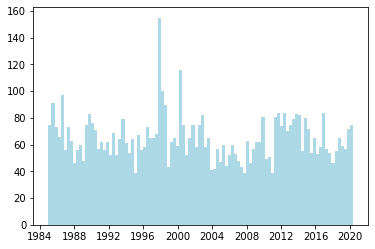

In [2]:
import matplotlib.dates as mdates
df["Time"] = df["Time"].astype("datetime64")
fig, ax = plt.subplots(1,1)
ax.hist(df['Time'], bins=100, color='lightblue')
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [3]:
df.sort_values(by='Time',ascending=True,inplace=True)
num=pd.Series([i for i in reversed(range(0,int(df.size/len(df.columns))))])  #range(0,2,-1) gives [2,1], riversed gives [1,0]
df=pd.concat([df,num],axis=1)
df.set_index(0,inplace=True) #remember inplace


In [4]:
df=df.iloc[::-1]
starting_time=df['Time'].iloc[0]
end_time=df['Time'].iloc[6495]
diff_value=[]
for i in df.index:
    diff=(df['Time'].iloc[i]-starting_time).total_seconds()
    diff_value.append(diff)
diff_value=pd.Series(diff_value)
df=pd.concat([diff_value,df],axis=1)   
df.rename({0:'Diff_time'},axis=1,inplace=True)
df

,Diff_time,Spacetime_distance,Mainshock,Aftershock,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,index
0,0.000000e+00,1.353561e+07,11187.0,11186.0,809,1985-01-09 03:13:01.090,43.3020,12.63800,4.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,8 km SE Gubbio (PG),11186
1,1.450036e+05,1.676533e+05,11187.0,11185.0,1019,1985-01-10 19:29:44.730,39.6090,16.37100,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.5,--,5 km N San Demetrio Corone (CS),11185
2,2.350554e+05,9.783141e+05,11190.0,11184.0,1099,1985-01-11 20:30:36.530,37.4040,14.44300,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,2 km SW Aidone (EN),11184
3,3.112916e+05,8.658320e+07,11185.0,11183.0,1159,1985-01-12 17:41:12.700,39.4500,16.39100,13.3,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,4 km S Acri (CS),11183
4,9.085170e+05,1.261267e+08,11187.0,11181.0,1669,1985-01-19 15:34:58.090,40.4540,16.12700,8.3,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,5 km SW Accettura (MT),11181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1.113711e+09,2.325441e+06,36.0,4.0,24313381,2020-04-25 07:21:54.480,37.7523,14.61750,23.5,BULLETIN-INGV,NaN,NaN,NaN,ML,3.4,--,4 km SE Troina (EN),4
6492,1.113782e+09,3.531638e+07,6208.0,3.0,24317311,2020-04-26 02:59:02.450,40.8285,14.15167,2.5,SURVEY-INGV-OV,NaN,NaN,NaN,Md,3.1,--,5 km E Pozzuoli (NA),3
6493,1.113965e+09,8.460595e+06,9.0,2.0,24326451,2020-04-28 05:57:28.820,38.4052,13.60600,25.4,SURVEY-INGV,NaN,NaN,NaN,ML,3.1,--,Costa Siciliana centro-settentrionale (Palermo),2
6494,1.113970e+09,3.537832e+06,2.0,1.0,24326871,2020-04-28 07:14:45.750,38.5943,14.17220,27.5,SURVEY-INGV,NaN,NaN,NaN,ML,3.0,--,Tirreno Meridionale (MARE),1


In [19]:
a=df[(df['Magnitude']>4.2 )& (df['Time']>datetime.datetime(1989,1,1,1,1,1))& (df['Time']<datetime.datetime(2020,1,1,1,1,1))]

a#.first_valid_index()

,Diff_time,Spacetime_distance,Mainshock,Aftershock,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,index
895,1.476385e+08,6.417965e+06,10586.0,9841.0,263219,1989-09-13 21:54:01.450,45.8210,11.1700,9.6,BULLETIN-VAX,NaN,NaN,NaN,Md,4.7,--,6 km NE Vallarsa (TN),9841
956,1.548372e+08,8.747919e+04,10926.0,9756.0,283129,1989-12-06 05:33:13.740,43.6080,16.8930,5.0,BULLETIN-VAX,NaN,NaN,NaN,M,4.8,--,Croatia [Land],9756
1043,1.678037e+08,7.140921e+04,9636.0,9632.0,314539,1990-05-05 07:21:19.510,40.6820,15.8480,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,5.0,--,6 km NE Potenza (PZ),9632
1059,1.703248e+08,4.679347e+04,9632.0,9582.0,327329,1990-06-03 11:39:14.510,44.6560,17.6320,10.0,BULLETIN-VAX,NaN,NaN,NaN,ML,4.5,--,Bosnia and Herz. [Land],9582
1104,1.776765e+08,1.136001e+04,9654.0,9509.0,343319,1990-08-27 13:48:42.460,43.3620,17.4010,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,4.4,--,Bosnia and Herz. [Land],9509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6369,1.095007e+09,6.182445e+09,2162.0,139.0,23131221,2019-09-21 19:55:44.220,40.3645,15.1498,327.5,BULLETIN-INGV,NaN,NaN,NaN,ML,4.3,--,3 km NE Cicerale (SA),139
6382,1.097890e+09,5.980175e+06,1443.0,125.0,23324541,2019-10-25 04:31:38.020,39.7002,15.4323,12.1,BULLETIN-INGV,NaN,NaN,NaN,Mw,4.4,--,Tirreno Meridionale (MARE),125
6392,1.099060e+09,7.054380e+06,2374.0,115.0,23414191,2019-11-07 17:35:21.180,41.7762,13.6043,16.2,BULLETIN-INGV,NaN,NaN,NaN,Mw,4.4,--,5 km SE Balsorano (AQ),115
6403,1.100672e+09,4.417364e+05,1443.0,104.0,23492041,2019-11-26 09:19:25.935,43.1631,17.9810,10.4,SURVEY-INGV-A,NaN,NaN,NaN,mb,5.3,--,Bosnia and Herz. [Land],104


In [20]:

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
#a=pd.concat([diff_value,a],axis=1) 
cnt=0
while cnt <diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
#events_interval 
#diff_time

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [21]:

number_time=pd.DataFrame(events_interval)
number_time

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.000000e+00,7.198752e+06,2.016524e+07,2.268631e+07,3.003808e+07,3.063207e+07,3.663494e+07,3.795384e+07,3.932102e+07,6.887522e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.198752e+06,2.016524e+07,2.268631e+07,3.003808e+07,3.063207e+07,3.663494e+07,3.795384e+07,3.932102e+07,6.887522e+07,7.110041e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.198752e+06,2.016524e+07,2.268631e+07,3.003808e+07,3.063207e+07,3.663494e+07,3.795384e+07,3.932102e+07,6.887522e+07,7.110041e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.198752e+06,2.016524e+07,2.268631e+07,3.003808e+07,3.063207e+07,3.663494e+07,3.795384e+07,3.932102e+07,6.887522e+07,7.110041e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7.198752e+06,2.016524e+07,2.268631e+07,3.003808e+07,3.063207e+07,3.663494e+07,3.795384e+07,3.932102e+07,6.887522e+07,7.110041e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,6.353376e+08,6.359362e+08,6.394741e+08,6.394864e+08,6.553488e+08,6.602364e+08,6.653932e+08,6.670811e+08,6.823066e+08,6.840898e+08,...,9.240639e+08,9.257802e+08,9.473689e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,6.353376e+08,6.359362e+08,6.394741e+08,6.394864e+08,6.553488e+08,6.602364e+08,6.653932e+08,6.670811e+08,6.823066e+08,6.840898e+08,...,9.240639e+08,9.257802e+08,9.473689e+08,9.502511e+08,NaN,NaN,NaN,NaN,NaN,NaN
736,6.359362e+08,6.394741e+08,6.394864e+08,6.553488e+08,6.602364e+08,6.653932e+08,6.670811e+08,6.823066e+08,6.840898e+08,6.871397e+08,...,9.257802e+08,9.473689e+08,9.502511e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,6.394741e+08,6.394864e+08,6.553488e+08,6.602364e+08,6.653932e+08,6.670811e+08,6.823066e+08,6.840898e+08,6.871397e+08,6.883397e+08,...,9.473689e+08,9.502511e+08,9.514213e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
number_time_count=number_time.count(axis=1)
#lista=[i for i in range(130)]
#lista_fin=[i for i in range (880,890)]
#number_time_count.drop(lista,inplace=True)
#number_time_count.drop(lista_fin,inplace=True)
number_time_count

0      37
1      36
2      36
3      36
4      36
       ..
734    76
735    77
736    76
737    76
738    76
Length: 739, dtype: int64

(array([ 7., 14., 13.,  7.,  4., 19.]),
 array([74. , 75.5, 77. , 78.5, 80. , 81.5, 83. ]),
 <a list of 6 Patch objects>)

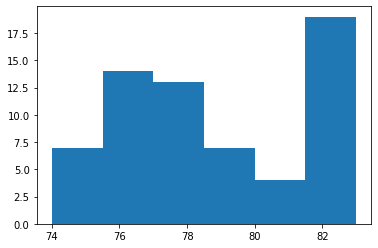

In [69]:
plt.hist(number_time_count,bins=6)

In [23]:
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(3000):
    random.shuffle(nt)
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for i in range(31)]
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency
    s=np.random.poisson(np.mean(nt_choice),len(nt_choice))
    #chi2_contingency(number_time_count,s)
    test,d=chisquare(nt_choice,s)
    chi.append(test)
chi
mean(chi)

198.20946359013297

(array([ 22., 177., 402., 319.,  66.,  14.]),
 array([13.        , 19.16666667, 25.33333333, 31.5       , 37.66666667,
        43.83333333, 50.        ]),
 <a list of 6 Patch objects>)

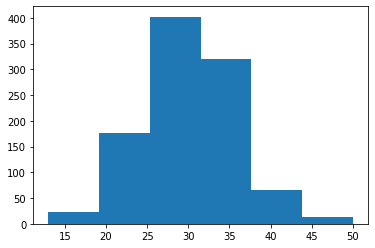

In [209]:
plt.hist(s,bins=6)

In [267]:
list(number_time_count)

[145,
 133,
 139,
 138,
 108,
 121,
 158,
 132,
 115,
 109,
 109,
 131,
 113,
 139,
 116,
 153,
 138,
 112,
 146,
 148,
 106,
 112,
 147,
 113,
 121,
 122,
 120,
 147,
 122,
 129,
 140,
 115,
 114,
 105,
 156,
 116,
 121,
 108,
 127,
 108,
 152,
 122,
 121,
 121,
 134,
 108,
 127,
 135,
 112,
 147,
 121,
 115,
 110,
 131,
 121,
 115,
 131,
 121,
 105,
 136,
 129,
 135,
 113,
 117,
 121,
 122,
 119,
 151,
 111,
 120,
 128,
 120,
 153,
 116,
 131,
 131,
 122,
 134,
 139,
 122,
 111,
 130,
 123,
 162,
 121,
 125,
 122,
 120,
 119,
 160,
 122,
 123,
 104,
 122,
 135,
 119,
 127,
 161,
 110,
 103,
 121,
 112,
 115,
 114,
 121,
 121,
 151,
 111,
 140,
 170,
 122,
 156,
 120,
 135,
 120,
 145,
 120,
 134,
 109,
 122,
 115,
 153,
 121,
 113,
 143,
 106,
 134,
 131,
 153,
 120,
 120,
 120,
 121,
 109,
 113,
 132,
 119,
 115,
 115,
 108,
 140,
 131,
 145,
 114,
 132,
 111,
 157,
 126,
 155,
 146,
 108,
 132,
 103,
 121,
 121,
 145,
 115,
 112,
 113,
 112,
 120,
 110,
 150,
 126,
 157,
 144,
 131

In [74]:
a=df[(df['Magnitude']>4.5)& (df['Time']>datetime.datetime(1998,1,1,1,1))& (df['Time']<datetime.datetime(2020,1,1,1,1,1))]

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(1000):
    random.shuffle(nt)
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for u in range(31)]
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency
    s=np.random.poisson(np.mean(nt),len(nt_choice))
    #chi2_contingency(number_time_count,s)
    test,d=chisquare(nt_choice,s)
    chi.append(test)
mean(chi)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


41.07172721037988